## Importing necessory pacakages

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [205]:
ecoli_data=pd.read_csv('ecoli.csv')

#### Displaying first 5 rows for overview

In [3]:
ecoli_data.head()

,X1,X2,X3,X4,X5,C
0,-0.007564,0.222171,0.158978,1.159728,0.267387,0
1,0.171858,-0.041690,0.250635,0.165851,0.461043,0
2,0.736046,0.343963,0.749114,0.561858,0.712554,0
3,0.000639,-0.175082,0.070584,0.317284,0.582597,0
4,0.571760,-0.244216,0.234515,0.902095,0.594026,0


### Missing value check
To make sure data does not contain any null values


In [6]:
missing_val=ecoli_data.isnull().sum()

In [7]:
missing_val

X1    0
X2    0
X3    0
X4    0
X5    0
C     0
dtype: int64

#### Checking target variable for class imbalance


In [12]:
ecoli_data['C'].value_counts()

C
0    77
1    52
Name: count, dtype: int64

### Correlation analysis

In [13]:
correlation=ecoli_data.corr()

In [14]:
correlation

,X1,X2,X3,X4,X5,C
X1,1.000000,0.088768,0.075019,-0.042973,-0.078337,0.237523
X2,0.088768,1.000000,0.032293,-0.094101,-0.145810,0.345237
X3,0.075019,0.032293,1.000000,-0.005492,-0.014480,-0.068347
X4,-0.042973,-0.094101,-0.005492,1.000000,-0.051284,-0.310577
X5,-0.078337,-0.145810,-0.014480,-0.051284,1.000000,-0.326354
C,0.237523,0.345237,-0.068347,-0.310577,-0.326354,1.000000


Correlation between features suggests that each feature providing distinct information

### Model Building

In [235]:
def Protien_Location_Classification(algorithm, train_x,train_y,test_x,test_y):
    #model

    global probabilities
    global accuracy
    global precision
    global recall
    global f1score
    global roc_score
    global conf_matrix
    global roc
    global fpr,tpr,thresholds
    global rocauc

    

    
    algorithm.fit(train_x,train_y)
    predictions=algorithm.predict(test_x)
    probablities=algorithm.predict_proba(test_x)

    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(test_y, predictions))
    print("Accuracy Score:", accuracy_score(test_y, predictions))

    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions, average='weighted')
    recall = recall_score(test_y, predictions, average='weighted')
    f1score = f1_score(test_y, predictions, average='weighted')
    roc_score = roc_auc_score(test_y, algorithm.predict_proba(test_x)[:, 1])


    #confusion matrix
    conf_matrix=confusion_matrix(test_y,predictions)

    #roc_auc_curve
    roc=roc_auc_score(test_y,predictions)
    print("Area under curve:", roc_score,"\n")
    
    fpr, tpr, thresholds = roc_curve(test_y, probablities[:,1])

    rocauc = auc(fpr,tpr)

    #plot confusion matrix

    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels='actual', yticklabels='predict')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion-Matrix for '+str(type(algorithm).__name__))

    plt.subplot(1,2,2)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % rocauc, color='green')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
    plt.title('ROC')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')

    
    plt.tight_layout()
    plt.show()

    

    


### Spliting the data into feature and taret varaible

In [30]:
features=ecoli_data.drop('C',axis=1)
target=ecoli_data['C']

### Splitting the data into training and testing set

In [31]:
train_x, test_x, train_y, test_y=train_test_split(features,target,test_size=0.3, random_state=101)

### Logistic Regression
##### Logistic Regression is a statistical method used for classification, which predicts the probability of a response (having two possible outcomes) based on one or more predictor variables. In our dataset, it is identified whether a protein is found in the periplasm or the inner membrane, features (X1, X2, X3, X4, X5) represent features of the protein and The target variable (C) is binary, making it suitable for Logistic Regression.
##### Linear regression work on the principle of linear equation similar to linear regression $$ C_i = f(X_i, \beta) + e_i $$ the equation is quite similar to y=mx+c where X are the input features The linear equation output is then passed through a logistic(sigmoid) function which transforms it into a value between 0 and 1.
##### The sigmoid function is given by: 
$$ P(C=1 | X) = \frac{1}{1 + e^{-z}} $$ Here $P(C=1 | X)$ is the probablity that the target variable Y is in class 1(paraplasm) given the features X, The classification decision makes on probablity P(C=1∣X). if probability exceeds or gets equal to the threshold (0.5) the location of protien is classified in class 1 (paraplasm) otherwise class 0 (inner membrane) 

##### There are Many parameters in logistics regression that can be used to tune the optimization, and performance as well as help in avoiding overfitting or underfitting the data, Here I have used a few parameters in logistic regression.

- Regularization parameters like `C` in Logistic Regression help control overfitting and underfitting, the smaller values of C indicate high regularization.
- Parameters like `max_iter` is related to the optimization of the algorithm. They control how long the model should train and how precise the optimization should be
- Parameters such as `n_jobs` allow you to manipulate computational resources, by setting n_jobs to a higher number, we can make use of more CPU cores to speed up training on large datasets.
- The fundamental behavior of the algorithm is defined by the solver parameter. Different solvers have different advantages and are suitable for different types of data, 'liblinear' is a good choice for small datasets, and other solvers like 'sag' and 'saga' are for larger datasets.
- class_weight parameters are particularly used to deal with issues like class imbalance, which is a common problem in many real-world classification tasks.
 

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.87      0.72      0.79        18

    accuracy                           0.82        39
   macro avg       0.83      0.81      0.82        39
weighted avg       0.83      0.82      0.82        39

Accuracy Score: 0.8205128205128205
Area under curve: 0.8809523809523809 



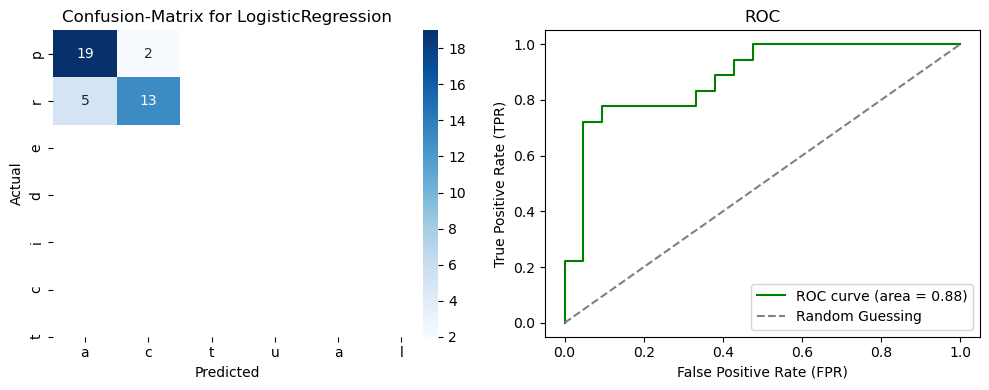

In [236]:
loicR=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

Protien_Location_Classification(loicR,train_x,train_y, test_x, test_y)

accuracy_lr=accuracy
precision_lr=precision
recall_lr=recall
f1score_lr=f1score
roc_score_lr=roc_score
conf_matrix_lr=conf_matrix
fpr_lr,tpr_lr,thresold_lr=fpr ,tpr ,thresholds
rocauc_lr=rocauc

### Gaussian Naive bayes
##### Naive bayes is a popular probalistic machine learning algorithm used for many classificaton problem and is based on bayes threom, It work on conditional probability. Conditional probability is the measure of probablity of an event occuring given that another event has occured. 
##### The formula is $$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$ Gaussian Naïve Bayes is the extension of naïve Bayes, Naive bayes assumes that each features are independent and makes equal contribution to outcome.
##### in out dataset it assumes that no features are dependent, and it proved by the correlation matrix that there is no depencncy between X1,X2,X3,X4,X5 every feature is indepent and makes equal contribution.

##### Here in our dataset we need need to determine the location of protein wether it is in paraplasm or in inner membrane, given the features of the protien.By putting for x the chain rule we get, $$ P(y|x_1, \ldots, x_n) = \frac{P(x_1|y)P(x_2|y)\ldots P(x_n|y)P(y)}{P(x_1)P(x_2)\ldots P(x_n)} $$ 

##### To compute the posterior probability P(y|X), it first generates a Frequency Table for each feature compared to the target. After that, the frequency tables are converted into Likelihood Tables, and the posterior probability for each class is calculated using the Nave Bayesian equation. The class with the highest posterior probability is the outcome of the prediction.

##### This is general naiye bayes approach. However, in gaussian Nayes Bayes, the likelihood of the features is assumed to be Gaussian, The likelihood of a feature value given a class label is computed as: $$ P(x_i | C_k) = \frac{1}{\sqrt{2\pi\sigma_{k,i}^2}} \exp\left(-\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2}\right) $$
- Each P(Xi| Ck) is modeled as a Gaussian distribution
- mu_{k,i} and sigma_{k,i}^2 are the mean and variance of the feature X for class C

##### The only difference in naive bayes and Gaussian naive bayes is that it includes mean and varience in likelhood calculation, The class with the highest posterior probability is chosen as the predicted class.

Algorithm: GaussianNB

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.86      0.67      0.75        18

    accuracy                           0.79        39
   macro avg       0.81      0.79      0.79        39
weighted avg       0.80      0.79      0.79        39

Accuracy Score: 0.7948717948717948
Area under curve: 0.8677248677248678 



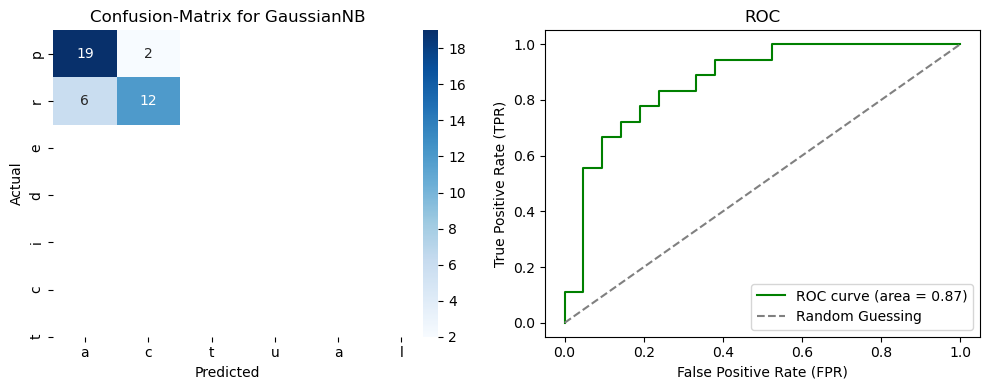

In [237]:
gnb=GaussianNB(priors=None)

Protien_Location_Classification(gnb,train_x,train_y, test_x, test_y)

accuracy_nb=accuracy
precision_nb=precision
recall_nb=recall
f1score_nb=f1score
roc_score_nb=roc_score
conf_matrix_nb=conf_matrix
fpr_nb,tpr_nb,thresold_nb=fpr ,tpr ,thresholds
rocauc_nb=rocauc

### Compairing model performance

In [152]:
pf_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1score_lr, roc_score_lr],
    'Gaussian Naive Bayes': [accuracy_nb, precision_nb, recall_nb, f1score_nb, roc_score_nb]
})

In [153]:
pf_comparison

,Metric,Logistic Regression,Gaussian Naive Bayes
0,Accuracy,0.820513,0.794872
1,Precision,0.826282,0.804835
2,Recall,0.820513,0.794872
3,F1 Score,0.818337,0.790970
4,ROC AUC,0.880952,0.867725


<function matplotlib.pyplot.show(close=None, block=None)>

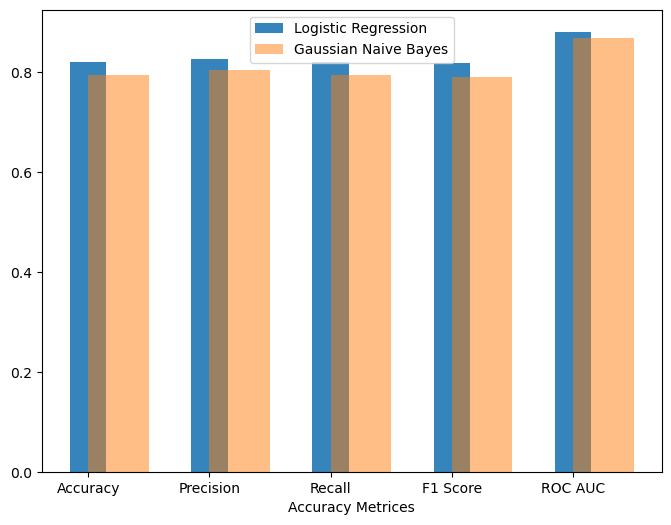

In [176]:
plt.figure(figsize=(8,6))
plt.bar(pf_comparison['Metric'],pf_comparison['Logistic Regression'],label="Logistic Regression", alpha=0.9,width=0.3)
plt.bar(pf_comparison['Metric'],pf_comparison['Gaussian Naive Bayes'],label="Gaussian Naive Bayes", alpha=0.5,width=0.5,align='edge')
plt.xlabel('Accuracy Metrices')
plt.legend()
plt.show

##### I have used Accuracy, precision, recall, F1 score, and Roc score metrices to get the comprehensive view of the model performance. for any classification problem these metrices are considered to evaluate the model performances 

#### Precision
##### It is the measure of positive prediction accuracy, it is defined as the ratio of  correct positive predictions to the total number of positive predictions including false positives. In other words, of all results labeled as positive (1) how many are actually positive (1)

##### I have got 82% precision in Logistic regression and 80% precision in Naiye Bayes which means on average 81% of the time model is able to predict the location of the protein. High precision signifies low false positive


#### Recall
##### Also termed as true positive rate, it is the measure of model's ability to correctly identify all relevant instances
##### The Mathematical notation of recall is $$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$ where TP is true positive and FP is false negative

#####  In the context of this dataset the average recall is 80% which provides information that out of all the cases that are actually positive the models are able to achieve correct output at least 80% of the time. But misses 20%


#### F1 Score
##### In simple terms it is defined as the harmonic mean of precision and recall. it is useful when we need to balance precision and recall.
##### The Mathematical notation of recall is $$ F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

##### In this dataset our precision and recall are not dispersed, F1 score could be avoid in these cases but F1 is very good metrices to balance these aspects and provide a single metric to evaluate the model performance


#### Accuracy 
##### Accuracy is one of the wodely used metrices for evaluting the perforance of classiication model. it measure the number of correct prediction with total number of result 
##### The mathmatical notation of accuracy is $$ \text{Accuracy} = \frac{\text{Number of Correct output}}{\text{Total Number of outputs}} $$

##### If my model is able to acheive 82% or 79% accuracy which clearly means these model can correctly identifies 82% and 79% of these sample either as positive or negative

#### Confusion matrix
##### I created a confusion matrix to compare the outcomes of logistic regression and Gaussian Naive Bayes on True Positive, True Negative, False Positive, and False Negative.

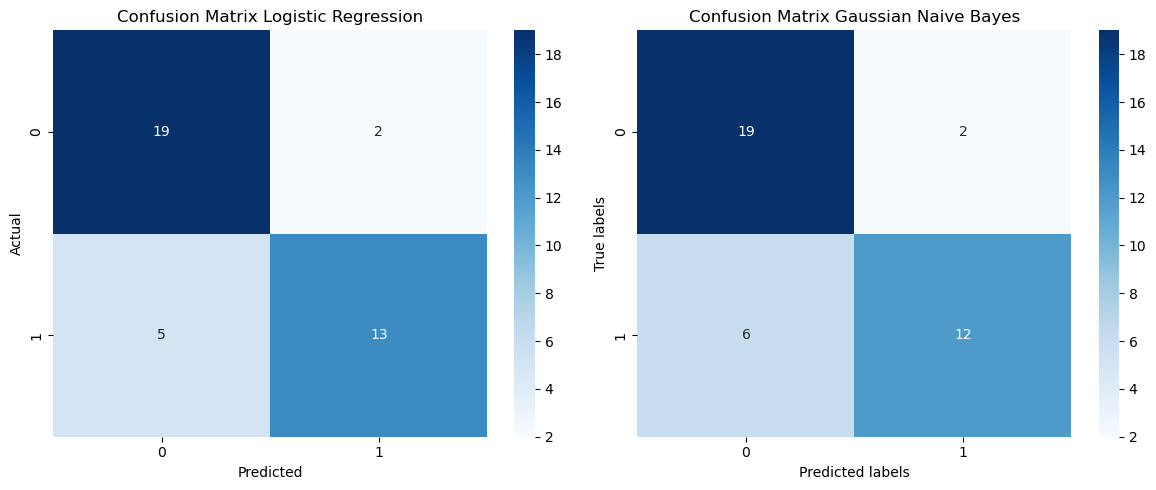

In [213]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion Matrix for Logistic Regression
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Confusion Matrix Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].xaxis.set_ticklabels(['0', '1'])
axes[0].yaxis.set_ticklabels(['0', '1'])

# Confusion Matrix for Gaussian Naive Bayes
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Confusion Matrix Gaussian Naive Bayes')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].xaxis.set_ticklabels(['0', '1'])
axes[1].yaxis.set_ticklabels(['0', '1'])

plt.tight_layout()
plt.show()

##### The square on top left measures the True Positive and square at bottom right measures False negative, their sum is used to identify total number of correct prediction, whereas the square at top right is false positive and sqaure at bottom left is false negative, They are also termed as Type 1 and Type 2 error. It reprent that model has made an error. FP and FN neither should be too high or too low it should be moderate. High FP might indicates that model is too easy is baised on predicitng positive and higher FN might indicate that model is too hard, could miss potential actual positive case

##### In our data Logistic regression perfroms better than Gaussian Naive Bayes, as it has correctly identifies more TP and less false negative than Gaussian Naive Bayes

#### ROC
##### Roc curve stands for Receiver Operating Characterstic curve, it is a graphical illustration employed to measure the performance of classification models at different thresholds settings

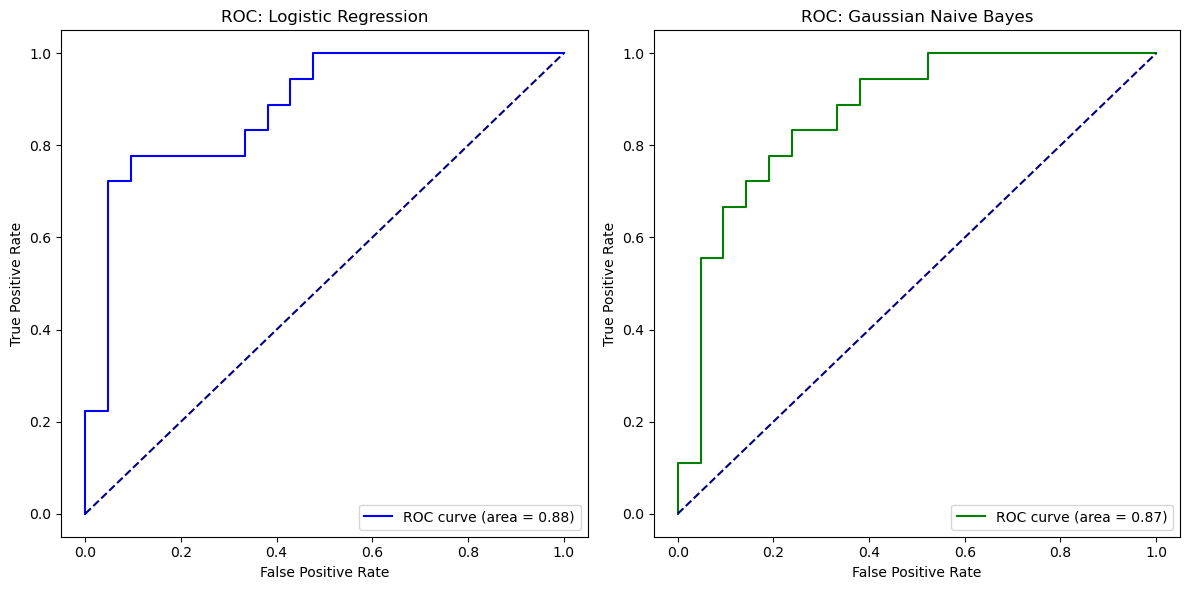

In [209]:
plt.figure(figsize=(12, 6))

# ROC for Logistic Regression
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, color='blue', label='ROC curve (area = %0.2f)' % rocauc_lr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Logistic Regression')
plt.legend(loc="lower right")

# ROC for Gaussian Naive Bayes
plt.subplot(1, 2, 2)
plt.plot(fpr_nb, tpr_nb, color='green', label='ROC curve (area = %0.2f)' % rocauc_nb)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Gaussian Naive Bayes')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

##### Understanding ROC AUC
- TPR True Positive Rate is the measure of number of positive prediction to all the actual positive values
- FPR False Positive Rat, it measure the ratio of all the real negative values to all mistakenly anticipated positive values is known as the False Positive Rate.
- Plotting the True Positive Rate (Sensitivity) vs the False Positive Rate (1 - Specificity) for different threshold values gives these results.
- AUC-ROC, AUC stands for Area Under Curve It has a range from 0 to 1, where 1 signifies a good classifier and 0.5 represents a random classifier.Their ability to discriminate between the two classes is better when the AUC is higher.

##### Understanding the Results 
- 0.5 to 0.6: Insufficient distinction. The model exceeds radom chance.
- 0.6–0.7: Reasonable discernment. The model has the ability to distinguish between classes.
- 0.7 to 0.8: Adequate distinction. The ability of the model to differentiate between classes is average.
- 0.8 to 0.9: Excellent distinction. The ability of model to distinct across classes is high.
- 0.9–1.0: Outstanding distinction. The model does a remarkable job of differentiating between classes.

### Validating the performance
##### The code perform 6-fold cross-validation on the dataset for both models, resulting the average accuracy and the dispersion from mean average/(standard deviation) of the accuracy across the folds. These metrics help in understanding the expected performance on new data and how consistent the model will perform.

In [226]:
# Cross Validation
lr_scores = cross_val_score(loicR, features, target, cv=6)
gnb_scores = cross_val_score(gnb, features,target, cv=6)

# Calculate the mean and standard deviation of the scores
lr_cv_mean = lr_scores.mean()
lr_cv_std = lr_scores.std()

gnb_cv_mean = gnb_scores.mean()
gnb_cv_std = gnb_scores.std()

# Print the results
print("Logistic Regression: Mean accuracy = {:.2f}, Standard Deviation = {:.2f}".format(lr_cv_mean, lr_cv_std))
print("Gaussian Naive Bayes: Mean accuracy = {:.2f}, Standard Deviation = {:.2f}".format(gnb_cv_mean, gnb_cv_std))

Logistic Regression: Mean accuracy = 0.73, Standard Deviation = 0.09
Gaussian Naive Bayes: Mean accuracy = 0.72, Standard Deviation = 0.08


#### Interpreting the result 
- Logistic Regression: Mean accuracy = 0.73, Standard Deviation = 0.09
- Gaussian Naive Bayes: Mean accuracy = 0.72, Standard Deviation = 0.08

#### Validation conclusion
- Since Logistic Regression shows higher mean accuracy it is evident that logistics regression performs better on average than Gaussian Naive Bayes.
- Logistic Regression and Gaussian shows consistent results across different splits, they both show lower standard deviation result proves that logistics regression and Naive Bayes gives better consistency.
- There is  slight more variability in Logistic regression performance, this could be due to overfitting, underfitting, or inherent data variability.

#### Visualizing the performance of K-Fold Cross validation

Text(0.5, 1.0, 'K-Fold Cross-Validation Accuracy with Standard Deviation')

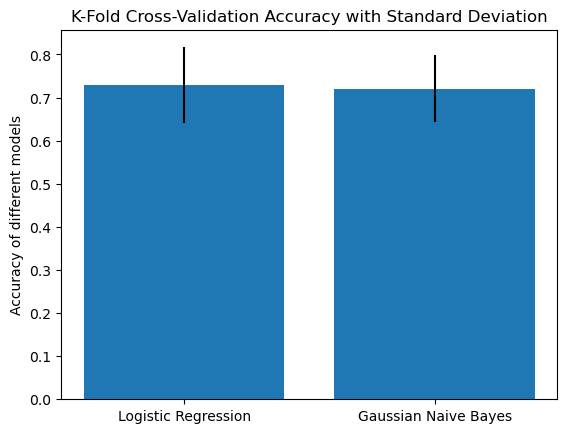

In [231]:
# Create lists for plotting
models = ['Logistic Regression', 'Gaussian Naive Bayes']
mean = [lr_cv_mean, gnb_cv_mean]
std = [lr_cv_std, gnb_cv_std]

# Plotting the results
fig, axis = plt.subplots()

# Mean accuracy bars
axis.bar(models, mean, yerr=std)

# Labels and Titles
axis.set_ylabel('Accuracy of different models')
axis.set_xticks(models)
axis.set_xticklabels(models)
axis.set_title('K-Fold Cross-Validation Accuracy with Standard Deviation')



##### each bar here representing the mean accuracy of a model, and the error bars ticks represent the variance (standard deviation) of those accuracies.

### Conclusion 

##### Performance metrices
- As per the classification report of logistics regression we get 79% precision, for 0 which is inner membrane and 87% precision for 1 which is paraplasm. this signifies that, this model gives more precise result for predicting class 1 paraplasm as it has higher precision. On the other hand, The Gaussian Naive Bayes shows quite similar results of precision at 76% of class 0 and 86% of class 1.
- Logistic regression shows higher recall for the class 1 at 72% whereas Gaussian Naive Bayes at 67% resulting that logistic regression is better at identifying class 1(paraplasm). In addition to this both model shows similarity in identifying class 0 at 90% shows they are equally good at class 0.
- F1 score is just the harmonic mean of precision and recall, F1 score of logistic regression shows sightly higher results for both classes. this also means that logistics regression have more balanced precision and recall as compared to Gaussian Naive Bayes
- Overall the Logistics regression accuracy is approximately about 82%, while Gaussian Naive Bayes is at 79%. Through all the performance metrices it is evident that logistics regresion shows better result and more accurate overall for this dataset.



##### In terms of AUC (Area Under the Curve) scoring, Logistics regression shows a slightly higher AUC score at 0.88 in camparison with Gaussian Naive Bayes which is approximately at 0.86. Higher AUC score suggests that the logistics model can better measure the separiblity as well as distinguishing between class 1 and 0 

##### In this dataset, the Logistic Regression model outperforms the Gaussian Naive Bayes model on most metrics. It has higher accuracy, a better balance of recall and precision (F1-score), and a higher AUC value, indicating a superior ability to classify classes correctly and distinguish between classes.

##### These insights would practically guide in the selection of a model, However both the model are at par with each other there is only slight difference in performance metrices. In real world we cannot justify that logistics would perform better, the choice of model is entirely on specific requirement of the task at hand. 